In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

import sys
sys.path.insert(1, '..')
from functions import *

PATH = 'data/'

## Tasks

1. **Derive (analytically) the second order derivative of the Gaussian**

2. **Implement the function**

    Implement a function that takes the variance $t$ as input and outputs a filter kernel of $g$ and $d^2g/dx^2$. You should use a filter kernel with a size of at least $\pm3 \sqrt{t}$. Why? 
    
    **Hint:** Set a variable $r = ⌈3\sqrt{t}⌉$, make an array with the integer values $[−r, . . . , r]$ and compute the Gaussian on these values.

3. Try the filter kernel on the synthetic test image ```test_blob_uniform.png``` and inspect the result.

The Gaussian equation is given as:

\begin{equation}
 g(x;t) = \frac{1}{\sqrt{2t\pi}} \exp \left (-\frac{x^2}{2t} \right )
\end{equation}

Taking the first derivative (Use the product rule for the exp term)

\begin{align}
 \frac{\partial}{\partial x} g(x;t) &= \frac{1}{\sqrt{2t\pi}} \frac{\partial}{\partial x} \exp \left (-\frac{x^2}{2t} \right ) \\
 &= \frac{1}{\sqrt{2t\pi}} \exp \left (-\frac{x^2}{2t} \right ) \cdot \left (-\frac{x}{t} \right ) \\
 &= - \frac{x}{t} g(x;t)
\end{align}

Taking the second derivate 

\begin{align}
 \frac{\partial^2}{\partial x^2} g(x;t) &= -  \frac{\partial}{\partial x} \left ( \frac{x}{t} g(x;t) \right )\\
 &= - \left ( \frac{\partial}{\partial x}  \frac{x}{t}  g(x;t) + \frac{x}{t} \frac{\partial}{\partial x} g(x;t) \right )   \\
 &= - \left ( \frac{1}{t}  g(x;t) + \frac{x^2}{t^2} g(x;t) \right )   \\
  &= - \left ( \frac{1}{t} + \frac{x^2}{t^2} \right )  g(x;t)   \\
\end{align}

In [35]:
def gaussian_2grad(x, t):
    """
    Computes the second derivative of a Gaussian function.

    Parameters:
        x (numpy.ndarray): The input array for which the second derivative of the Gaussian is computed.
        t (float): The variance (sigma squared) of the Gaussian function.

    Returns:
        numpy.ndarray: The second derivative of the Gaussian function evaluated at each point in x.
    """
    kernel = (1/t + x**2/t**2) * np.exp(-x**2/(2*t))
    return kernel/np.sum(kernel)

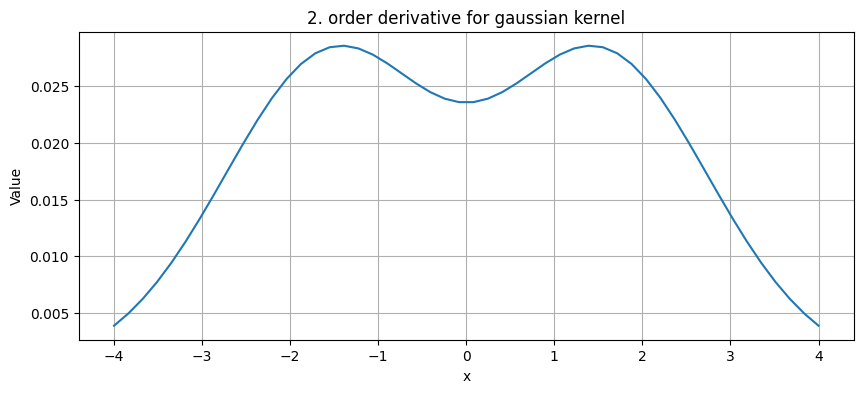

In [36]:
T = 2
RADIUS = int(3*np.sqrt(T))
x = np.linspace(-RADIUS, RADIUS, 50)
kernel_2grad = gaussian_2grad(x, T)

# Plot the kernels
plt.figure(figsize=(10, 4))

# Plot normalized Gaussian kernel
plt.plot(x, kernel_2grad)
plt.title(f"2. order derivative for gaussian kernel")
plt.xlabel("x")
plt.ylabel("Value")
plt.grid()


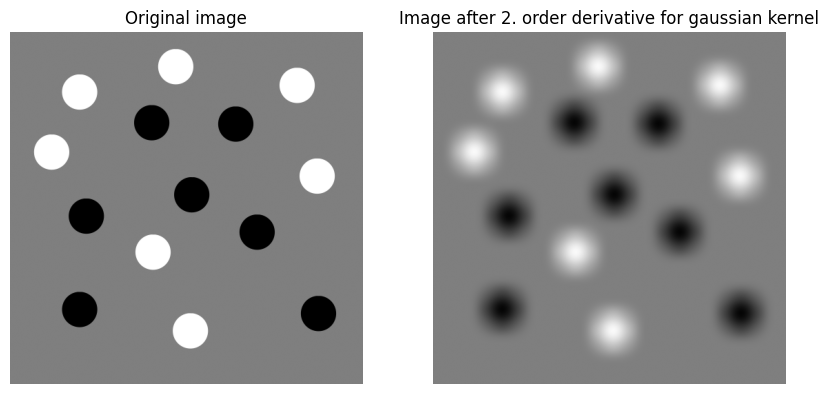

In [41]:
image = get_gray_image(PATH + 'test_blob_uniform.png')
kernel_2grad_matrix = np.outer(kernel_2grad, kernel_2grad)
image_blurred = convolve(image, kernel_2grad_matrix)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image, cmap='gray', vmin=0, vmax=1)
ax[0].set_title("Original image")
ax[0].axis('off')
ax[1].imshow(image_blurred, cmap='gray', vmin=0, vmax=1)
ax[1].set_title("Image after 2. order derivative for gaussian kernel")
ax[1].axis('off')
plt.show()